In [1]:
import pandas as pd
import numpy as np
import csv

# Reading Data

In [2]:
vaers_data = pd.read_csv("2021VAERSDATA.csv", encoding='latin1')
vax_data = pd.read_csv("2021VAERSVAX.csv", encoding='latin1')
sympts_data = pd.read_csv("2021VAERSSYMPTOMS.csv", encoding='latin1')

C:\Users\91967\AppData\Local\Temp\ipykernel_9252\3697039453.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  vaers_data = pd.read_csv("2021VAERSDATA.csv", encoding='latin1')


# Data Pre-Processing

In [3]:
vaers_data.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [4]:
df = vaers_data[['VAERS_ID','AGE_YRS','SEX','VAX_DATE','ONSET_DATE','HOSPITAL','BIRTH_DEFECT']]

In [5]:
# Convert 'VAX_DATE' and 'ONSET_DATE' columns to datetime
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'], errors='coerce')
df['ONSET_DATE'] = pd.to_datetime(df['ONSET_DATE'], errors='coerce')

# Create a new column 'DATE_DIFF' with the difference between 'ONSET_DATE' and 'VAX_DATE'
df['DATE_DIFF'] = df['ONSET_DATE'] - df['VAX_DATE']

C:\Users\91967\AppData\Local\Temp\ipykernel_9252\1746019026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'], errors='coerce')
C:\Users\91967\AppData\Local\Temp\ipykernel_9252\1746019026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ONSET_DATE'] = pd.to_datetime(df['ONSET_DATE'], errors='coerce')
C:\Users\91967\AppData\Local\Temp\ipykernel_9252\1746019026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [6]:
df

,VAERS_ID,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,HOSPITAL,BIRTH_DEFECT,DATE_DIFF
0,916600,33.0,F,2020-12-28,2020-12-30,NaN,NaN,2 days
1,916601,73.0,F,2020-12-31,2020-12-31,NaN,NaN,0 days
2,916602,23.0,F,2020-12-31,2020-12-31,NaN,NaN,0 days
3,916603,58.0,F,2020-12-23,2020-12-23,NaN,NaN,0 days
4,916604,47.0,F,2020-12-22,2020-12-29,NaN,NaN,7 days
...,...,...,...,...,...,...,...,...
753040,1997122,50.0,M,2021-09-04,2021-10-01,NaN,NaN,27 days
753041,1998663,83.0,F,2021-03-25,2021-04-01,Y,Y,7 days
753042,1998668,NaN,F,NaT,NaT,NaN,NaN,NaT
753043,2554159,49.0,M,2021-05-14,2021-12-08,NaN,NaN,208 days


In [7]:
sympts_data

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,910642,Dyspnoea,25.0,Heart rate increased,25.0,SARS-CoV-2 test negative,25.0,NaN,NaN,NaN,NaN
1,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
3,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
4,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1004105,2675502,Fatigue,26.0,Headache,26.0,Pyrexia,26.0,NaN,NaN,NaN,NaN
1004106,2675503,Erythema,26.0,Laboratory test normal,26.0,Myalgia,26.0,Pyrexia,26.0,Rash,26.0
1004107,2675503,Skin warm,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004108,2681134,Underdose,26.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_df = pd.merge(df, sympts_data, on='VAERS_ID', how='left')

In [9]:
merged_df

,VAERS_ID,AGE_YRS,SEX,VAX_DATE,ONSET_DATE,HOSPITAL,BIRTH_DEFECT,DATE_DIFF,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,33.0,F,2020-12-28,2020-12-30,NaN,NaN,2 days,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,73.0,F,2020-12-31,2020-12-31,NaN,NaN,0 days,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,23.0,F,2020-12-31,2020-12-31,NaN,NaN,0 days,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,58.0,F,2020-12-23,2020-12-23,NaN,NaN,0 days,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,47.0,F,2020-12-22,2020-12-29,NaN,NaN,7 days,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004108,1998668,NaN,F,NaT,NaT,NaN,NaN,NaT,Tenderness,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004109,2554159,49.0,M,2021-05-14,2021-12-08,NaN,NaN,208 days,COVID-19,25.1,Drug ineffective,25.1,Illness,25.1,Influenza like illness,25.1,Laboratory test,25.1
1004110,2554159,49.0,M,2021-05-14,2021-12-08,NaN,NaN,208 days,Malaise,25.1,Pain,25.1,Pyrexia,25.1,Respiratory tract congestion,25.1,SARS-CoV-2 test positive,25.1
1004111,2554159,49.0,M,2021-05-14,2021-12-08,NaN,NaN,208 days,Somnolence,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df = merged_df[['VAERS_ID','AGE_YRS','SEX','DATE_DIFF','HOSPITAL','BIRTH_DEFECT','SYMPTOM1','SYMPTOM2']]

In [11]:
merged_df = pd.merge(merged_df, vax_data, on='VAERS_ID', how='left')
merged_df

,VAERS_ID,AGE_YRS,SEX,DATE_DIFF,HOSPITAL,BIRTH_DEFECT,SYMPTOM1,SYMPTOM2,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,33.0,F,2 days,NaN,NaN,Dysphagia,Epiglottitis,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,73.0,F,0 days,NaN,NaN,Anxiety,Dyspnoea,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,23.0,F,0 days,NaN,NaN,Chest discomfort,Dysphagia,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,58.0,F,0 days,NaN,NaN,Dizziness,Fatigue,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,47.0,F,7 days,NaN,NaN,Injection site erythema,Injection site pruritus,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070516,1998668,NaN,F,NaT,NaN,NaN,Tenderness,NaN,UNK,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,VACCINE NOT SPECIFIED (OTHER)
1070517,2554159,49.0,M,208 days,NaN,NaN,COVID-19,Drug ineffective,COVID19,PFIZER\BIONTECH,EW0171,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
1070518,2554159,49.0,M,208 days,NaN,NaN,Malaise,Pain,COVID19,PFIZER\BIONTECH,EW0171,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
1070519,2554159,49.0,M,208 days,NaN,NaN,Somnolence,NaN,COVID19,PFIZER\BIONTECH,EW0171,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))


In [12]:
filtered_data = merged_df[['VAERS_ID','AGE_YRS','SEX','DATE_DIFF','HOSPITAL','SYMPTOM1','VAX_TYPE']]

In [13]:
filtered_data['HOSPITAL'] = filtered_data['HOSPITAL'].fillna(0)

C:\Users\91967\AppData\Local\Temp\ipykernel_9252\515454573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['HOSPITAL'] = filtered_data['HOSPITAL'].fillna(0)


In [14]:
filtered_data['DATE_DIFF'] = filtered_data['DATE_DIFF'].dt.days

C:\Users\91967\AppData\Local\Temp\ipykernel_9252\3052031009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DATE_DIFF'] = filtered_data['DATE_DIFF'].dt.days


In [15]:
filtered_data.dtypes

VAERS_ID       int64
AGE_YRS      float64
SEX           object
DATE_DIFF    float64
HOSPITAL      object
SYMPTOM1      object
VAX_TYPE      object
dtype: object

In [16]:
filtered_data = filtered_data.dropna()

In [17]:
filtered_data

,VAERS_ID,AGE_YRS,SEX,DATE_DIFF,HOSPITAL,SYMPTOM1,VAX_TYPE
0,916600,33.0,F,2.0,0,Dysphagia,COVID19
1,916601,73.0,F,0.0,0,Anxiety,COVID19
2,916602,23.0,F,0.0,0,Chest discomfort,COVID19
3,916603,58.0,F,0.0,0,Dizziness,COVID19
4,916604,47.0,F,7.0,0,Injection site erythema,COVID19
...,...,...,...,...,...,...,...
1070515,1998663,83.0,F,7.0,Y,Urinary tract infection,COVID19
1070517,2554159,49.0,M,208.0,0,COVID-19,COVID19
1070518,2554159,49.0,M,208.0,0,Malaise,COVID19
1070519,2554159,49.0,M,208.0,0,Somnolence,COVID19


In [18]:
filtered_data = filtered_data[filtered_data['DATE_DIFF']>=0]
filtered_data = filtered_data[filtered_data['VAX_TYPE']=='COVID19']

In [19]:
filtered_data['SEX'] = filtered_data['SEX'].replace({'M': 0, 'F': 1})

In [20]:
filtered_data['HOSPITAL'] = filtered_data['HOSPITAL'].replace({'Y': 1})

In [21]:
filtered_data

,VAERS_ID,AGE_YRS,SEX,DATE_DIFF,HOSPITAL,SYMPTOM1,VAX_TYPE
0,916600,33.0,1,2.0,0,Dysphagia,COVID19
1,916601,73.0,1,0.0,0,Anxiety,COVID19
2,916602,23.0,1,0.0,0,Chest discomfort,COVID19
3,916603,58.0,1,0.0,0,Dizziness,COVID19
4,916604,47.0,1,7.0,0,Injection site erythema,COVID19
...,...,...,...,...,...,...,...
1070515,1998663,83.0,1,7.0,1,Urinary tract infection,COVID19
1070517,2554159,49.0,0,208.0,0,COVID-19,COVID19
1070518,2554159,49.0,0,208.0,0,Malaise,COVID19
1070519,2554159,49.0,0,208.0,0,Somnolence,COVID19


In [22]:
one_hot_encoded = pd.get_dummies(filtered_data['SYMPTOM1'], prefix='SYMPTOM1')
filtered_data_encoded = pd.concat([filtered_data, one_hot_encoded], axis=1)

In [23]:
filtered_data_encoded.drop(columns=['VAERS_ID','VAX_TYPE','SYMPTOM1'], inplace=True)

In [24]:
hospital_0 = filtered_data_encoded[filtered_data_encoded['HOSPITAL'] == 0]
hospital_1 = filtered_data_encoded[filtered_data_encoded['HOSPITAL'] == 1]

# Determine the number of samples to take from each group
n_samples_per_group = min(len(hospital_0), len(hospital_1), 5000)  # Assuming there are at least 5000 samples in each group

# Randomly sample from each group
sampled_hospital_0 = hospital_0.sample(n=n_samples_per_group, random_state=42)
sampled_hospital_1 = hospital_1.sample(n=n_samples_per_group, random_state=42)

# Concatenate the sampled subsets
balanced_sample = pd.concat([sampled_hospital_0, sampled_hospital_1], axis=0)

# Randomly select 10,000 rows from the balanced sample
final_sample = balanced_sample.sample(n=10000, random_state=42)

In [26]:
final_sample.replace({False: 0, True: 1}, inplace=True)

In [32]:
final_sample.drop(columns=['SEX'],inplace=True)

# Modelling

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

X = final_sample.drop(columns=['HOSPITAL'])
y = final_sample['HOSPITAL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get coefficients (importance) of features
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns.tolist()

# Create a dictionary of feature names and their importance
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the dictionary by importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important feature
print("Most important feature:", sorted_feature_importance[0])

Accuracy: 0.7485
Most important feature: ('SYMPTOM1_Injection site erythema', 4.792193761160234)


C:\Users\91967\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Importance

In [53]:
sorted_feature_importance[:10]

[('SYMPTOM1_Injection site erythema', 4.792193761160234),
 ('SYMPTOM1_Expired product administered', 3.998309896764722),
 ('SYMPTOM1_Erythema', 3.772764626031463),
 ('SYMPTOM1_Rash', 3.2433541511722956),
 ('SYMPTOM1_Product storage error', 2.9970043316475907),
 ('SYMPTOM1_Interchange of vaccine products', 2.969415179332527),
 ('SYMPTOM1_Pruritus', 2.846933735979978),
 ('SYMPTOM1_Anticoagulant therapy', 2.8362059860170294),
 ('SYMPTOM1_Urticaria', 2.6947860068763747),
 ('SYMPTOM1_Injection site pain', 2.6877831764306883)]

In [54]:
data_without_prefix = [(symptom.replace('SYMPTOM1_', ''), score) for symptom, score in sorted_feature_importance]

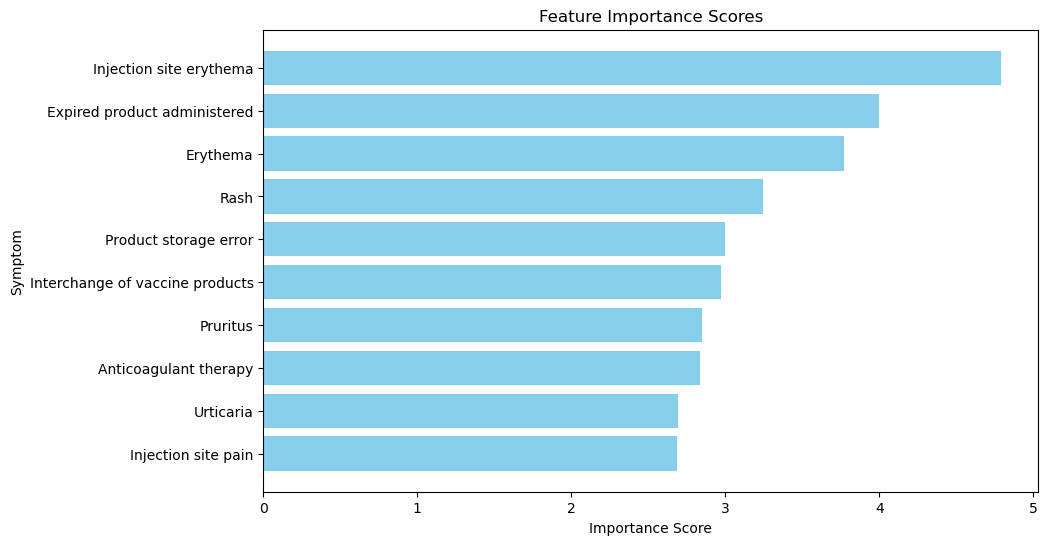

In [55]:
import matplotlib.pyplot as plt

# Extract symptom names and importance scores from the list of tuples
symptoms = [item[0] for item in data_without_prefix[:10]]
importance_scores = [item[1] for item in data_without_prefix[:10]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(symptoms, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Symptom')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()